# Notes:
    Idea is to check how we can extract Reports from TSAD library

# Import libs

In [1]:
from tsad.utils.evaluating import evaluating

import sys
sys.path.append("../..")


from data.SythData import LinearSteps, SinusoidWaves
from models.SubspaceBased import SingularSequenceTransformer
from utils.Reports import SummaryReport


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate data

In [10]:
# data = LinearSteps(length_data=1000, cps_number=5, white_noise_level="default").get()
data = SinusoidWaves(length_data=900, cps_number=30, white_noise_level="min").get()

<Axes: xlabel='time'>

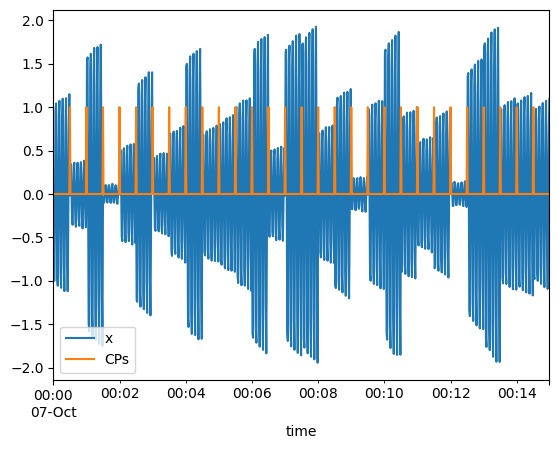

In [11]:
data.plot()

# Evalute

In [12]:
model = SingularSequenceTransformer(
                     is_z_normalization=True,
                     is_cps_filter_on=True,
                     is_squared_residual=True,
                     n_components=2,
                     threshold_std_coeff=3.7,
                     is_exp_squared=False).fit(list(data['x'].values), None)

In [13]:
cps_pred = model.predict(data['x'].values)

In [14]:
data['cps_pred'] = cps_pred

# Report creation

In [15]:
# test = evaluating.evaluating(data['CPs'], data['preds'], metric="average_time", verbose=True, portion=0.1, window_width="30 seconds")
SummaryReport().create_report(data, "cps_pred", "CPs")

,Average time delay,Missing changepoints,FPs,Number of true change-points
0,0 days 00:00:06.100000,19,0,29


# Plot results

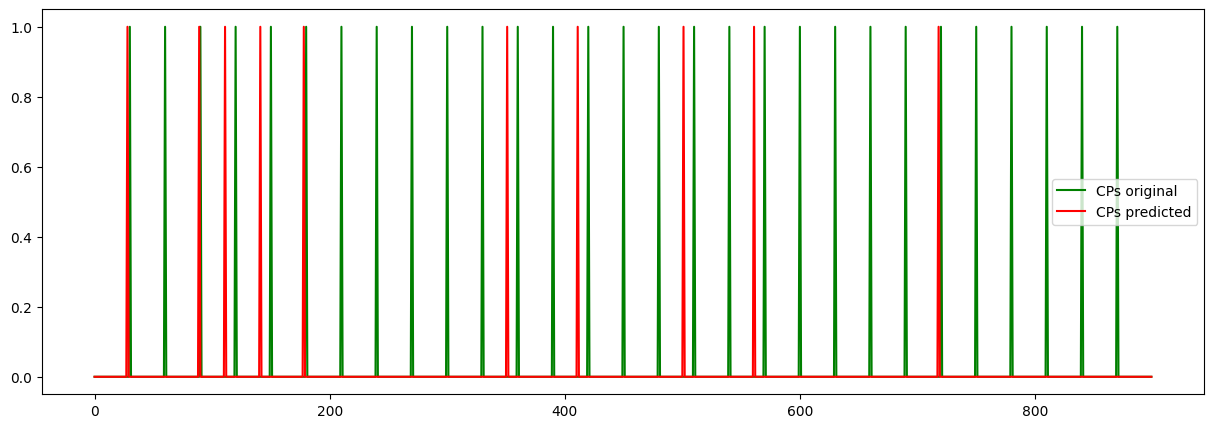

In [16]:
plt.figure(figsize=(15,5))
plt.plot(data['CPs'].values, label='CPs original', color='green')
plt.plot(cps_pred, label='CPs predicted', color='red')
plt.legend()